In [122]:
import pandas as pd

# Llegim el dataset
file_path = 'dataset.xlsx'  # Assegura't que el fitxer estigui a la mateixa carpeta que el notebook o especifica el camí complet

df = pd.read_excel(file_path, header=1)
print("Dataset carregat correctament!")
print(f"Dimensions del dataset: {df.shape}")  # Mostra el nombre de files i columnes

# Fem un cop d'ull a les primeres files
df.head()


Dataset carregat correctament!
Dimensions del dataset: (222, 77)


,Pedigree,Sex,FamilialvsSporadic,COD NUMBER,Age at diagnosis,Binary diagnosis,Final diagnosis,TOBACCO,Detail,Comorbidities,...,Type of family history,1st degree relative,2nd degree relative,More than 1 relative,Genetic mutation studied in patient,Mutation Type,Severity of telomere shortening,Severity of telomere shortening - Transform 4,Progressive disease,ProgressiveDisease
0,1,Male,Familial,13820545,70.0,No IPF,3,2,Tobacco-associated,0,...,CPFE,1,0,0,1.0,NaN,3.0,6.0,1.0,1.0
1,2,Male,Familial,12974225,66.0,No IPF,8,2,NaN,1,...,Unspecified PF,1,0,1,1.0,NaN,1.0,4.0,1.0,1.0
2,3,Male,Familial,13551148,59.0,No IPF,3,2,Tobacco-associated,0,...,Unspecified PF,1,0,0,1.0,NaN,3.0,6.0,1.0,1.0
3,4,Female,Familial,13597482,66.0,IPF,1,0,Organizing,1,...,NaN,1,0,0,0.0,NaN,4.0,3.0,1.0,1.0
4,5,Male,Familial,10572432,72.0,IPF,1,0,NaN,1,...,"IPF, Dendriform ossification, GPA, IPAF",1,0,1,1.0,TERT Exon 2b/HT/c.835G>A / p.Ala279Thr/ rs6174...,3.0,6.0,1.0,1.0


In [123]:
import numpy as np

df['Death'].fillna('No', inplace=True)
df.replace(-9, np.nan, inplace=True)
df.replace('n/a', np.nan, inplace=True)
df['Hematological abnormality before diagnosis'].replace('None', 'No', inplace=True)
df['Type of neoplasia'].replace('None', 'No', inplace=True)
df['Hematologic Disease'] = df['Hematologic Disease'].apply(lambda x: 'Yes' if x != 'No' else x)
df['Liver disease'] = df['Liver disease'].apply(lambda x: 'Yes' if x != 'No' else x)
df['Death'] = df.apply(lambda row: 'Transplant' if row['Death'] == 'No' and row['Transplantation date'] != 'No transplantation' else row['Death'], axis=1)
df['Progression'] = df['FVC (%) at diagnosis'] - df['FVC (%) 1 year after diagnosis']
df['Progression'] = df['Progression'].apply(lambda x: 'No' if x > 5 else 'Yes')

In [124]:
df.replace('Yes', 1, inplace=True)
df.replace('No', 0, inplace=True)
df.replace('Transplant', 2, inplace=True)

In [125]:
df.drop(columns=['FamilialvsSporadic', 'COD NUMBER', 'Binary diagnosis', 'Detail', 'Comorbidities', 'Detail on NON UIP', 'Pathology Pattern Binary', 'Pathology pattern UIP, probable or CHP', 'Pathology pattern', 'Extras AP', 'Diagnosis after Biopsy', 'Multidsciplinary committee', 'Pirfenidone', 'Nintedanib', 'Antifibrotic Drug', 'Prednisone', 'Mycophenolate', 'Type of telomeric extrapulmonary affectation', 'Extra', 'Type of liver abnormality', 'FVC (L) at diagnosis', 'FVC (L) 1 year after diagnosis', 'Transplantation date', 'Necessity of transplantation', 'Cause of death', 'Identified Infection', 'Date of death', 'Type of family history', 'Mutation Type', 'ProgressiveDisease', 'Severity of telomere shortening - Transform 4', 'Treatment'], inplace=True)

In [126]:
# Buscar observaciones con més de 5 valors nuls
df[df.isnull().sum(axis=1) > 5]

# Eliminar observaciones con més de 5 valors nuls
df.dropna(thresh=df.shape[1]-5, inplace=True)

In [127]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Age at diagnosis                               1
Biopsy                                         3
Extrapulmonary affectation                     1
Type of neoplasia                              3
Hematological abnormality before diagnosis    10
Blood count abnormality at diagnosis           1
Thrombocytopenia                               1
Leukopenia                                     2
Liver abnormality before diagnosis            18
FVC (%) 1 year after diagnosis                 2
DLCO (%) 1 year after diagnosis                5
Genetic mutation studied in patient           19
Severity of telomere shortening               69
Progressive disease                            8
dtype: int64

In [129]:
# Bucle per tractar valors nuls en totes les columnes
for column in df.columns:
    if df[column].isnull().sum() > 0:  # Comprova si hi ha valors nuls
        if df[column].dtype in ['object', 'category']:  # Per columnes categòriques
            most_frequent_class = df[column].mode()[0]
            df[column].fillna(most_frequent_class, inplace=True)
            print(f"Els valors nuls de '{column}' s'han imputat amb la moda: {most_frequent_class}")
        elif pd.api.types.is_numeric_dtype(df[column]):  # Per columnes numèriques
            mean_value = df[column].mean()
            df[column].fillna(mean_value, inplace=True)
            print(f"Els valors nuls de '{column}' s'han imputat amb la mitjana: {mean_value:.2f}")


Els valors nuls de 'Age at diagnosis' s'han imputat amb la mitjana: 66.51
Els valors nuls de 'Biopsy' s'han imputat amb la mitjana: 0.48
Els valors nuls de 'Extrapulmonary affectation' s'han imputat amb la mitjana: 0.14
Els valors nuls de 'Type of neoplasia' s'han imputat amb la moda: 0
Els valors nuls de 'Hematological abnormality before diagnosis' s'han imputat amb la mitjana: 0.14
Els valors nuls de 'Blood count abnormality at diagnosis' s'han imputat amb la mitjana: 0.25
Els valors nuls de 'Thrombocytopenia' s'han imputat amb la mitjana: 0.07
Els valors nuls de 'Leukopenia' s'han imputat amb la mitjana: 0.02
Els valors nuls de 'Liver abnormality before diagnosis' s'han imputat amb la mitjana: 0.12
Els valors nuls de 'FVC (%) 1 year after diagnosis' s'han imputat amb la mitjana: 82.27
Els valors nuls de 'DLCO (%) 1 year after diagnosis' s'han imputat amb la mitjana: 57.10
Els valors nuls de 'Genetic mutation studied in patient' s'han imputat amb la mitjana: 0.41
Els valors nuls de '

In [130]:
df.head()

,Pedigree,Sex,Age at diagnosis,Final diagnosis,TOBACCO,Radiological Pattern,Biopsy,Extrapulmonary affectation,Associated lung cancer,Other cancer,...,DLCO (%) 1 year after diagnosis,RadioWorsening2y,Death,1st degree relative,2nd degree relative,More than 1 relative,Genetic mutation studied in patient,Severity of telomere shortening,Progressive disease,Progression
0,1,Male,70.0,3,2,UIP,0.0,0.0,0.0,0.0,...,27.0,1.0,1,1,0,0,1.0,3.0,1.0,0
1,2,Male,66.0,8,2,Probable UIP,0.0,0.0,0.0,1.0,...,53.0,0.0,0,1,0,1,1.0,1.0,1.0,0
2,3,Male,59.0,3,2,UIP,1.0,0.0,0.0,0.0,...,28.4,1.0,2,1,0,0,1.0,3.0,1.0,1
3,4,Female,66.0,1,0,Non UIP,1.0,1.0,1.0,0.0,...,43.6,0.0,1,1,0,0,0.0,4.0,1.0,0
4,5,Male,72.0,1,0,Probable UIP,0.0,1.0,0.0,0.0,...,58.6,0.0,0,1,0,1,1.0,3.0,1.0,1


In [131]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd

# Converteix variables categòriques a numèriques amb One-Hot Encoding
X = pd.get_dummies(df.drop(columns=['Death']), drop_first=True)

# Variable objectiu
y = df['Death']

# Assegurar que y és del tipus int
y = y.astype(int)

# Dividim les dades en entrenament i test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrena el model Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Avaluar el model
y_pred = model.predict(X_test)
print("Informe de classificació:")
print(classification_report(y_test, y_pred))

# Calcular la importància de les característiques
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Importància de les característiques:")
print(feature_importances)

Informe de classificació:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94        34
           1       0.86      0.75      0.80         8
           2       0.00      0.00      0.00         2

    accuracy                           0.89        44
   macro avg       0.59      0.57      0.58        44
weighted avg       0.86      0.89      0.87        44

Importància de les característiques:
                                      Feature  Importance
33            DLCO (%) 1 year after diagnosis    0.122561
32             FVC (%) 1 year after diagnosis    0.107552
40                        Progressive disease    0.094551
31                      DLCO (%) at diagnosis    0.084953
30                       FVC (%) at diagnosis    0.074849
..                                        ...         ...
59  Type of neoplasia_Oropharyngeal Carcinoma    0.000000
60             Type of neoplasia_Prostate ADK    0.000000
46   Type of neoplasia_Basocellula

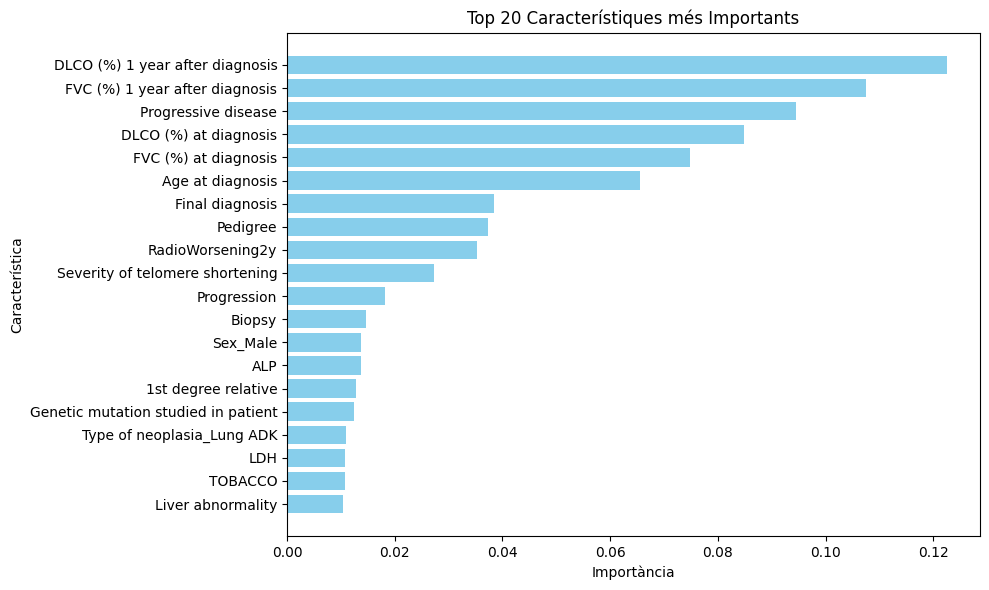

In [132]:
# Seleccionem només les 20 característiques més importants
top_features = feature_importances.head(20)

# Crear un gràfic millor ajustat
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color="skyblue")
plt.xlabel('Importància')
plt.ylabel('Característica')
plt.title('Top 20 Característiques més Importants')
plt.gca().invert_yaxis()  # Les característiques més importants a la part superior
plt.tight_layout()  # Ajusta l'espai per evitar que les etiquetes surtin tallades
plt.show()


In [133]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd

# Converteix variables categòriques a numèriques amb One-Hot Encoding
X = pd.get_dummies(df.drop(columns=['Progression']), drop_first=True)

# Variable objectiu
y = df['Progression']

# Assegurar que y és del tipus int
y = y.astype(int)

# Dividim les dades en entrenament i test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrena el model Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Avaluar el model
y_pred = model.predict(X_test)
print("Informe de classificació:")
print(classification_report(y_test, y_pred))

# Calcular la importància de les característiques
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Importància de les característiques:")
print(feature_importances)

Informe de classificació:
              precision    recall  f1-score   support

           0       0.71      0.38      0.50        13
           1       0.78      0.94      0.85        31

    accuracy                           0.77        44
   macro avg       0.75      0.66      0.68        44
weighted avg       0.76      0.77      0.75        44

Importància de les característiques:
                                              Feature  Importance
32                     FVC (%) 1 year after diagnosis    0.102544
33                    DLCO (%) 1 year after diagnosis    0.092764
34                                   RadioWorsening2y    0.087384
30                               FVC (%) at diagnosis    0.073762
1                                    Age at diagnosis    0.071097
..                                                ...         ...
59          Type of neoplasia_Oropharyngeal Carcinoma    0.000000
48                   Type of neoplasia_Bladder Cancer    0.000000
63           Typ

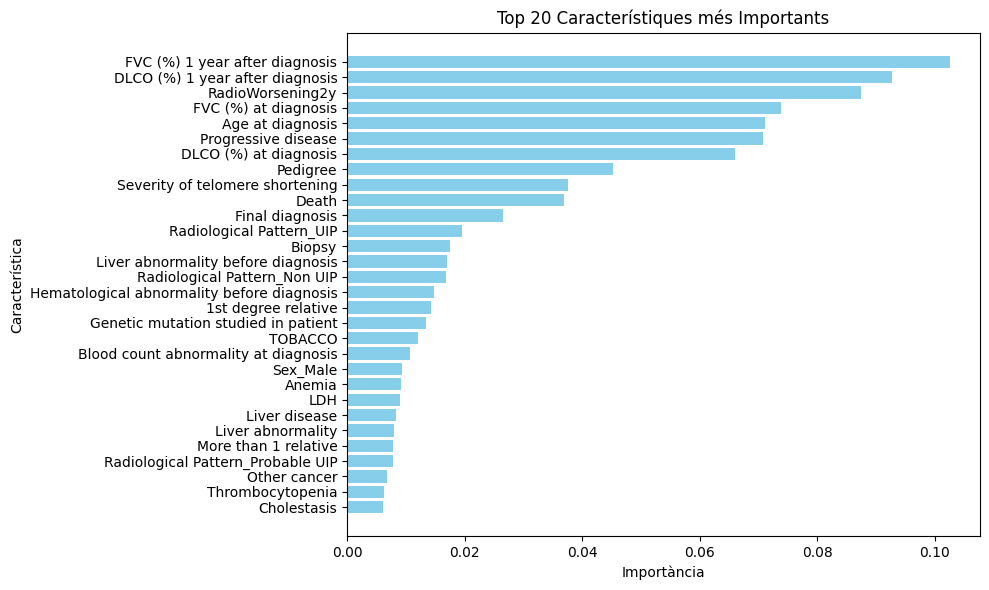

In [134]:
# Seleccionem només les 20 característiques més importants
top_features = feature_importances.head(30)

# Crear un gràfic millor ajustat
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color="skyblue")
plt.xlabel('Importància')
plt.ylabel('Característica')
plt.title('Top 20 Característiques més Importants')
plt.gca().invert_yaxis()  # Les característiques més importants a la part superior
plt.tight_layout()  # Ajusta l'espai per evitar que les etiquetes surtin tallades
plt.show()


In [135]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Converteix variables categòriques a numèriques amb One-Hot Encoding
X = pd.get_dummies(df.drop(columns=['Death']), drop_first=True)

# Variable objectiu
y = df['Death']

# Assegurar que y és del tipus int
y = y.astype(int)

# Dividim les dades en entrenament i test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Nrmalitza les dades
scaler = StandardScaler()

# Ajustem el scaler només al conjunt d'entrenament i transformem
X_train = scaler.fit_transform(X_train)

# Transformem el conjunt de test (sense ajustar)
X_test = scaler.transform(X_test)

# Entrenar un modelo
model = RandomForestClassifier(random_state=42, n_estimators=50)
model.fit(X_train, y_train)

from joblib import dump

# Guardar el model entrenat en un fitxer
dump(model, 'model_random_forest_death.pkl')
print("Model guardat com 'model_random_forest_death.pkl'")

# Evaluar el modelo
y_pred = model.predict(X_test)
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

Model guardat com 'model_random_forest_death.pkl'
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        34
           1       1.00      0.88      0.93         8
           2       0.00      0.00      0.00         2

    accuracy                           0.93        44
   macro avg       0.64      0.62      0.63        44
weighted avg       0.89      0.93      0.91        44

Matriz de confusión:
[[34  0  0]
 [ 1  7  0]
 [ 2  0  0]]


c:\Users\irene\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\irene\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\irene\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [136]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from joblib import dump, load

# Converteix variables categòriques a numèriques amb One-Hot Encoding
X = pd.get_dummies(df.drop(columns=['Progression']), drop_first=True)

# Variable objectiu
y = df['Progression']

# Assegurar que y és del tipus int
y = y.astype(int)

# Dividim les dades en entrenament i test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Entrenar el model Logistic Regression
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Guardar el model entrenat en un fitxer
dump(model, 'model_linear_regression_progression.pkl')
print("Model guardat com 'model_linear_regression_progression.pkl'")

# Evaluar el model
y_pred = model.predict(X_test)
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))


Model guardat com 'model_linear_regression_progression.pkl'
Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.97      1.00      0.98        31

    accuracy                           0.98        44
   macro avg       0.98      0.96      0.97        44
weighted avg       0.98      0.98      0.98        44

Matriz de confusión:
[[12  1]
 [ 0 31]]


In [137]:
df.columns

Index(['Pedigree', 'Sex', 'Age at diagnosis', 'Final diagnosis', 'TOBACCO',
       'Radiological Pattern', 'Biopsy', 'Extrapulmonary affectation',
       'Associated lung cancer', 'Other cancer', 'Type of neoplasia',
       'Hematological abnormality before diagnosis',
       'Blood count abnormality at diagnosis', 'Anemia', 'Thrombocytopenia',
       'Thrombocytosis', 'Lymphocytosis', 'Lymphopenia', 'Neutrophilia',
       'Neutropenia', 'Leukocytosis', 'Leukopenia', 'Hematologic Disease',
       'Liver abnormality before diagnosis', 'Liver abnormality', 'LDH', 'ALT',
       'AST', 'ALP', 'GGT', 'Transaminitis', 'Cholestasis', 'Liver disease',
       'FVC (%) at diagnosis', 'DLCO (%) at diagnosis',
       'FVC (%) 1 year after diagnosis', 'DLCO (%) 1 year after diagnosis',
       'RadioWorsening2y', 'Death', '1st degree relative',
       '2nd degree relative', 'More than 1 relative',
       'Genetic mutation studied in patient',
       'Severity of telomere shortening', 'Progressive di

In [138]:
categorias_radiological_pattern = df['Radiological Pattern'].unique()
print(categorias_radiological_pattern)

['UIP' 'Probable UIP' 'Non UIP' 'Indeterminate UIP']
